In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [143]:
# The dataframe
energy_data = pd.read_csv('Desktop/Data science/Hamoye internship/energydata_complete.csv', encoding ='latin-1')
print(energy_data.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [144]:
# Root mean squared error of the relationship between the temperature in the living room and outside.
x = energy_data['T2'].values.reshape(-1,1)
y= energy_data['T6'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_y = LinearRegression()
x_y.fit(x_train,y_train)
y_pred = x_y.predict(x_test)
y_mse = mean_squared_error(y_test,y_pred)
rmse = np.round(np.sqrt(y_mse),3)
print('Root mean squared error : {}'.format(rmse))

Root mean squared error : 3.63


In [146]:
# Mean absolute error and root mean squared error for the training set
x_v = energy_data.drop(['date','lights'],axis=1)
x_df = x_v.drop('Appliances', axis=1)
y_df = x_v['Appliances']
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.3,random_state=42)
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
x_train_norm_df = pd.DataFrame(x_train_norm)
reg = LinearRegression()
reg.fit(x_train_norm_df,y_train)
y_pred = reg.predict(x_train_norm)
mae = np.round(mean_absolute_error(y_train,y_pred),3)
rmse = np.round(mean_squared_error(y_train,y_pred,squared=False),3)
print('Mean absolute error for the training set: {}'.format(mae))
print('Root mean squared error for the training set : {}'.format(rmse))

Mean absolute error for the training set: 53.742
Root mean squared error for the training set : 95.216


In [147]:
# Mean absolute error and root mean squared error for the test set
x_v = energy_data.drop(['date','lights'],axis=1)
x_df = x_v.drop('Appliances', axis=1)
y_df = x_v['Appliances']
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.3,random_state=42)
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)
x_train_norm_df = pd.DataFrame(x_train_norm)
reg = LinearRegression()
reg.fit(x_train_norm_df,y_train)
y_pred = reg.predict(x_test_norm)
mae = np.round(mean_absolute_error(y_test,y_pred),3)
rmse = np.round(mean_squared_error(y_test,y_pred,squared=False),3)
print('Mean absolute error for the test set: {}'.format(mae))
print('Root mean squared error for the test set: {}'.format(rmse))









Mean absolute error for the test set: 53.643
Root mean squared error for the test set: 93.64


In [148]:
#Ridge regression model with default parameters
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
rmse = np.round(mean_squared_error(y_test,y_pred, squared=False),3)
print('Root mean squared of the ridge regression model is {},the RMSEs of the ridge and linear regression models are the same.'.format(rmse))




Root mean squared of the ridge regression model is 93.641,the RMSEs of the ridge and linear regression models are the same.


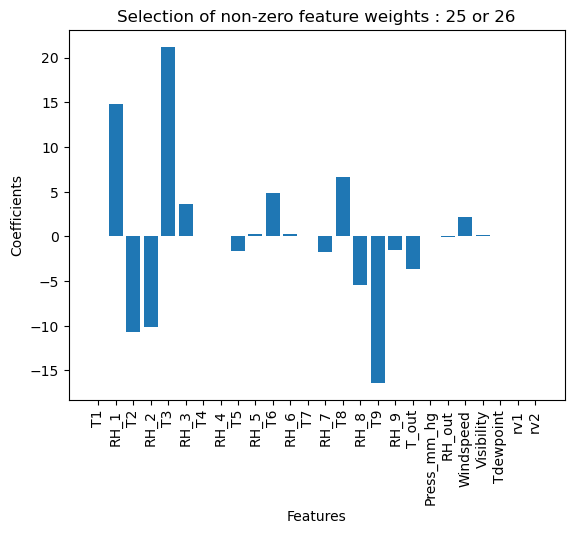

Root mean squared of the lasso regression model : 93.892


In [149]:
# Lasso regression model with default value
lasso= Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
lasso_coef = lasso.fit(x_train, y_train).coef_
names = x_df.columns
y_pred = lasso.predict(x_test)
rmse = np.round(mean_squared_error(y_test,y_pred, squared=False),3)
plt.bar(names,lasso_coef)
plt.xticks(rotation=90)
plt.title('Selection of non-zero feature weights : 25 or 26')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()
print('Root mean squared of the lasso regression model : {}'.format(rmse))